In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import util
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Filtering and Feature Selection

# Using Pearson Correlation

In [3]:
df_pearson = df.copy(deep=True)

In [4]:
df_pearson.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Pearson Correlation heatmap

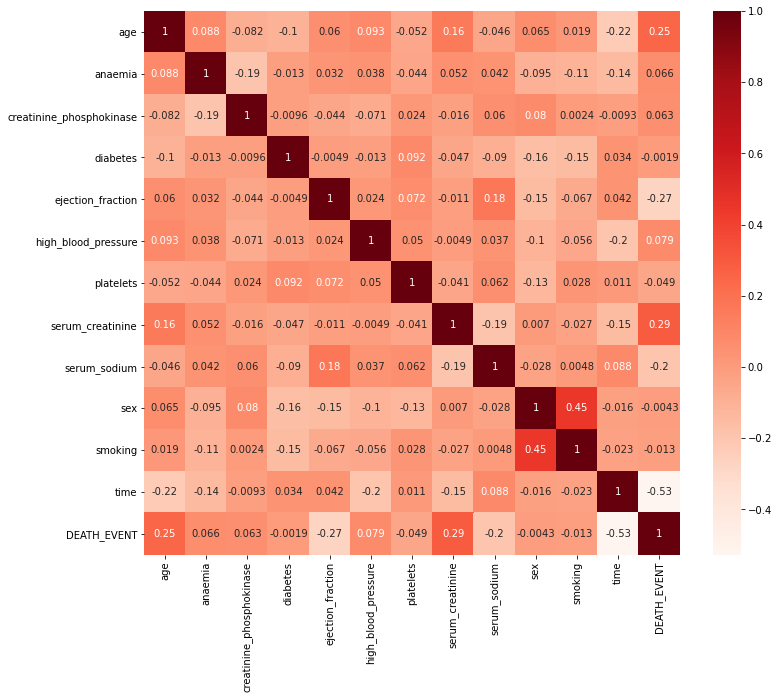

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_pearson.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Select Features with abs(Correlation Cofficient) Greater than or Equal to 0.2

In [6]:
#Correlation with output variable
cor_target = abs(cor["DEATH_EVENT"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [7]:
# keep dataframe only with relevant features
df_pearson = df_pearson[[i for i in relevant_features.index]]
df_pearson.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1


Normalize Datset

In [8]:
pearson_normalized = util.norm(df_pearson, target='DEATH_EVENT')
pearson_normalized.columns = [n for n in relevant_features.index]
pearson_normalized.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,1.192945,-1.530560,0.490057,-1.629502,1
1,-0.491279,-0.007077,-0.284552,-1.603691,1
2,0.350833,-1.530560,-0.090900,-1.590785,1
3,-0.912335,-1.530560,0.490057,-1.590785,1
4,0.350833,-1.530560,1.264666,-1.577879,1


Train/Test Split

In [11]:
from sklearn.model_selection import train_test_split

X = pearson_normalized[[n for n in relevant_features.index]]
y = pearson_normalized['DEATH_EVENT']
train, test = train_test_split(pearson_normalized, test_size=0.2)
X.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,1.192945,-1.530560,0.490057,-1.629502,1
1,-0.491279,-0.007077,-0.284552,-1.603691,1
2,0.350833,-1.530560,-0.090900,-1.590785,1
3,-0.912335,-1.530560,0.490057,-1.590785,1
4,0.350833,-1.530560,1.264666,-1.577879,1


In [12]:
train.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
221,0.350833,1.008578,-0.284552,0.900042,0
72,2.035057,-0.260991,-0.381379,-0.751905,1
191,0.266622,1.854958,0.102752,0.564490,0
178,0.182411,1.854958,-0.187726,0.216033,0
233,-0.659702,-0.007077,0.005926,1.016195,0


# (Pearson) make classifier, SVC with Gaussian Kernel

In [14]:
C_range = np.logspace(-3, 3, 13)
gamma_range = np.logspace(-9, 3, 13)

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [16]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 1.00
